In [53]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
df = pd.read_csv("market_data.csv")
df.head()

,date,ticker,volume,open,close,adjusted_close,high,low,splits,capital,...,yearly_return,weekly_volatility,monthly_volatility,quarterly_volatility,yearly_volatility,is_momentum,is_contrarian,is_buy_herding,is_sell_herding,is_panic
0,2005-06-15,1093384,122589,6210.0,6288.0,5796.12,6310.0,6210.0,0.0,6480000,...,NaN,NaN,NaN,NaN,NaN,f,f,t,t,f
1,2005-06-16,1093384,85764,6450.0,6298.0,5805.33,6600.0,6240.0,0.0,6480000,...,NaN,NaN,NaN,NaN,NaN,f,f,t,t,f
2,2005-06-19,1093384,52905,6298.0,6334.0,5838.51,6350.0,6290.0,0.0,6480000,...,NaN,NaN,NaN,NaN,NaN,f,f,t,t,f
3,2005-06-20,1093384,55537,6395.0,6431.0,5927.93,6470.0,6355.0,0.0,6480000,...,NaN,NaN,NaN,NaN,NaN,f,f,t,t,f
4,2005-06-21,1093384,114269,6450.0,6367.0,5868.94,6570.0,6340.0,0.0,6480000,...,NaN,NaN,NaN,NaN,NaN,f,f,t,t,f


In [54]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [55]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 1357.97 MB
Memory usage after optimization is: 523.15 MB
Decreased by 61.5%


In [68]:
df["Year"] = df.date.apply(lambda x: x[:4])
df["cash_flow_per_year"] = df.groupby("Year")["volume"].transform("sum")
data  = df[["Year", "cash_flow_per_year"]].drop_duplicates().sort_values("Year")
data.set_index("Year")

,cash_flow_per_year
Year,
2000,47880606795
2001,54850337704
2002,87193208713
2003,118580748609
2004,181846330773
2005,279978484499
2006,445894882301
2007,757279322606
2008,939505009397


In [69]:
print("Average of cash flow per years is >",data.cash_flow_per_year.mean())
print("Maximum cash flow was >",data.cash_flow_per_year.max())

Average of cash flow per years is > 472273904236.5909
Maximum cash flow was > 1259485631805


In [70]:
data

,Year,cash_flow_per_year
49,2000,47880606795
2234,2001,54850337704
2479,2002,87193208713
2728,2003,118580748609
2973,2004,181846330773
0,2005,279978484499
133,2006,445894882301
382,2007,757279322606
3953,2008,939505009397
4198,2009,1031528436108


Text(0.5, 1.0, 'CASH FLOW PER YEAR')

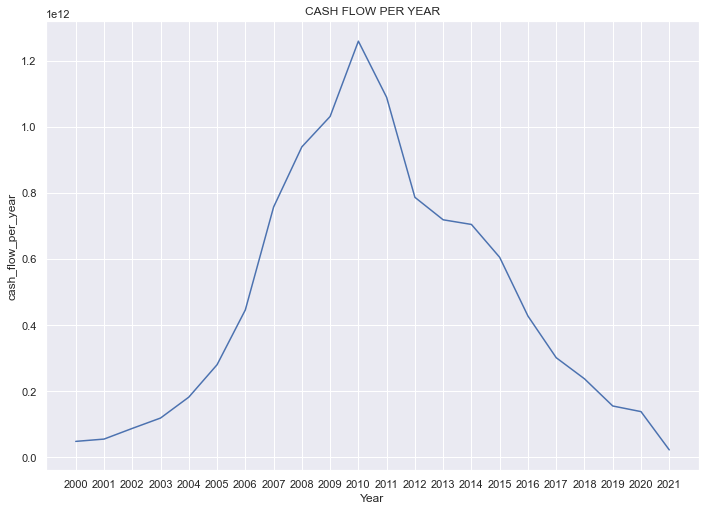

In [71]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(data=data, x="Year", y="cash_flow_per_year")
ax.set_title("CASH FLOW PER YEAR")

In [72]:
cashflow_yearly = data

In [60]:
df["month_of_year"] = df.date.apply(lambda x : x[2:4] + x[5:7])
df["cash_flow_per_month"] = df.groupby("month_of_year")["volume"].transform("sum")
data  = df[["month_of_year", "cash_flow_per_month"]].drop_duplicates().sort_values("month_of_year")
data.head()

,month_of_year,cash_flow_per_month
12365,0001,3900153645
12793,0002,4789051604
12814,0003,6105489738
2058,0004,3453773839
49,0005,3587287999


Text(0.5, 1.0, 'CASH FLOW PER MONTH')

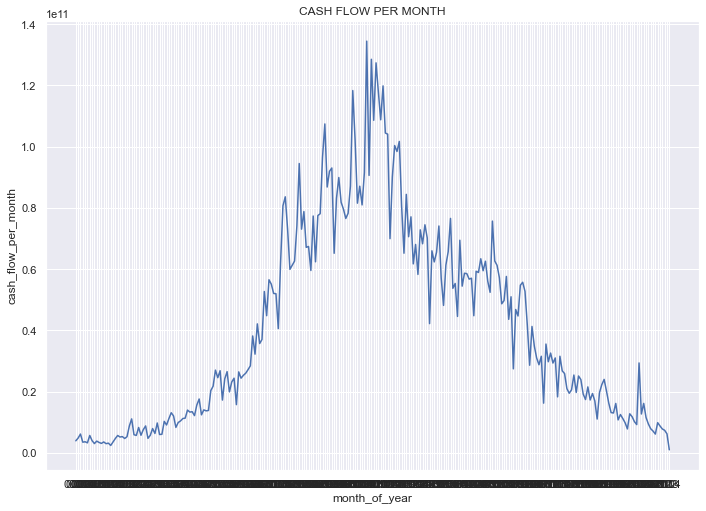

In [61]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(data=data, x="month_of_year", y="cash_flow_per_month")
ax.set_title("CASH FLOW PER MONTH")

In [62]:
cashflow_monthly = data

In [63]:
df["month"] = df.month_of_year.apply(lambda x : x[2:4])
df["half_of_year"] = df.month.apply(lambda x : 1 if x in["01", "02", "03", "04", "05","06"] else 2)
df["cash_flow_per_6months"] = df.groupby(["Year", "half_of_year"])["volume"].transform("sum")
data  = df[["Year", "half_of_year","cash_flow_per_6months"]].drop_duplicates().sort_values(["Year", "half_of_year"])
data.head()

,Year,half_of_year,cash_flow_per_6months
49,2000,1,25078382019
2107,2000,2,22802224776
2234,2001,1,20177256234
2357,2001,2,34673081470
2479,2002,1,44104773411


In [64]:
data.Year = data.Year.astype(int)
data.loc[data.half_of_year == 2, "Year"] = data.loc[data.half_of_year == 2, "Year"] + .5

Text(0.5, 1.0, 'CASH FLOW PER 6 MONTHS')

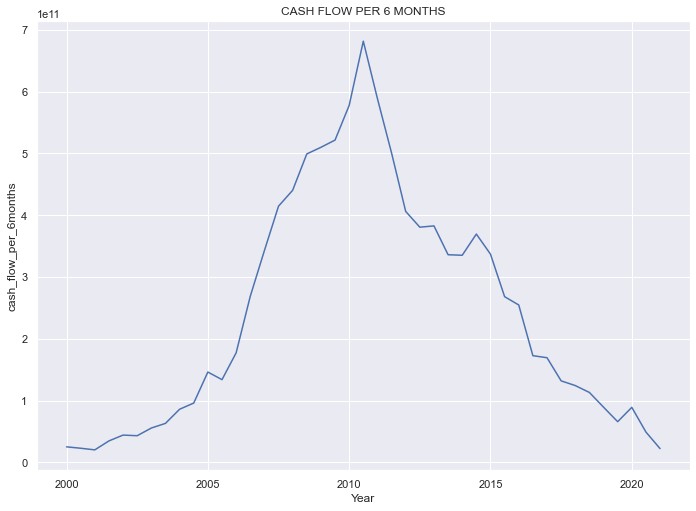

In [65]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(data=data, x="Year", y="cash_flow_per_6months")
ax.set_title("CASH FLOW PER 6 MONTHS")

In [66]:
cashflow_6month = data

## PART 2 with CASH FLOW

In [82]:
cashflow_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 12365 to 7202
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month_of_year            256 non-null    object 
 1   cash_flow_per_month      256 non-null    int64  
 2   cashflow_monthly_change  256 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 16.1+ KB


In [85]:
cashflow_monthly["cashflow_monthly_change"] = cashflow_monthly.cash_flow_per_month.pct_change().fillna(0)
cashflow_monthly["year"] = cashflow_monthly.month_of_year.apply(lambda x: "20" + x[:2])
cashflow_monthly["month"] = cashflow_monthly.month_of_year.apply(lambda x: x[2:])
cashflow_monthly.drop(["month_of_year"], 1, inplace = True)

In [89]:
cashflow_monthly.loc[(abs(cashflow_monthly.cashflow_monthly_change) > 0.5) & (cashflow_monthly.year != "2021")].sort_values("cashflow_monthly_change", ascending = False)

,cash_flow_per_month,cashflow_monthly_change,year,month
6934,29334584352,2.190180,2020,03
1558,35505862023,1.192205,2016,11
2027,19635906665,0.784626,2018,10
2107,5642348515,0.740056,2000,07
1682,31522130932,0.726964,2017,05
1292,46795678392,0.707141,2015,10
2769,10245648911,0.697368,2003,03
90,26415633616,0.681357,2005,11
2457,8725336523,0.666717,2001,12
6849,12725426394,0.636246,2019,11


In [90]:
cashflow_monthly.loc[(cashflow_monthly.year == "2020") & (cashflow_monthly.month.isin(["02", "03", "04"]))] 

,cash_flow_per_month,cashflow_monthly_change,year,month
6914,9195276217,-0.096293,2020,02
6934,29334584352,2.190180,2020,03
6955,12658359285,-0.568483,2020,04


In [95]:
plott = cashflow_monthly.loc[(cashflow_monthly.year == "2020") & (cashflow_monthly.month.isin(["01", "02", "03", "04", "05"]))] 

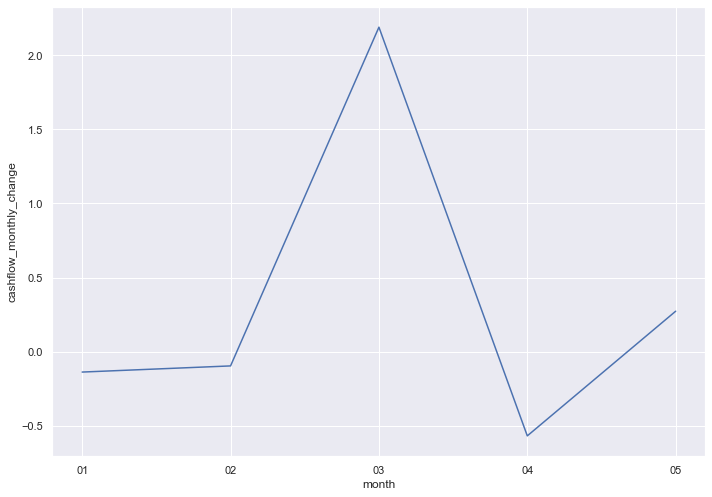

In [96]:
ax = sns.lineplot(data=plott, x="month", y="cashflow_monthly_change")

### Now, lets look at yearly periods for to detect material differences.

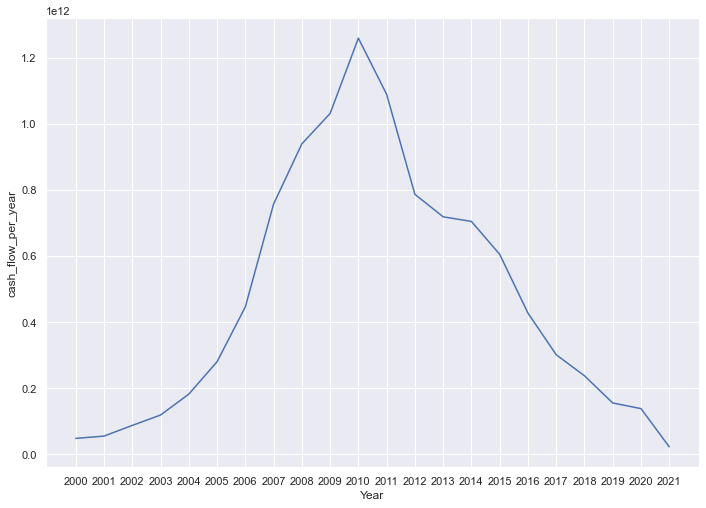

In [98]:
ax = sns.lineplot(data=cashflow_yearly, x="Year", y="cash_flow_per_year")

In [100]:
cashflow_yearly.loc[(cashflow_yearly.Year.isin(["2008", "2009", "2010", "2011", "2012", "2013"]))] 

,Year,cash_flow_per_year
3953,2008,939505009397
4198,2009,1031528436108
4446,2010,1259485631805
4690,2011,1089452009240
4934,2012,786785759468
5179,2013,718746089693


# TRADE FREQUENCY

In [104]:
df = pd.read_csv("market_data.csv")
df = reduce_mem_usage(df)

Memory usage of dataframe is 1357.97 MB
Memory usage after optimization is: 523.15 MB
Decreased by 61.5%


In [105]:
df.date = df.date.apply(lambda x: x[2:4] + x[5:7])
data =  df[["date", "volume"]]
data["trade_frequency"] = data.groupby("date").transform("count")
data.drop(["volume"], 1 , inplace = True)  # we dont need it for this step.
data.drop_duplicates(subset = "date", inplace = True)
data = data.sort_values("date")
data.head(10)

,date,trade_frequency
12365,0001,11077
12793,0002,11207
12814,0003,11393
2058,0004,9313
49,0005,11552
2087,0006,11168
2107,0007,12380
2129,0008,12480
2151,0009,11435
2171,0010,11480


In [106]:
data["year"] = data["date"].apply(lambda x: "20" + x[:2])
data["month"] = data["date"].apply(lambda x: x[2:])
data.reset_index(inplace = True, drop= True)
data.head(7)

,date,trade_frequency,year,month
0,0001,11077,2000,01
1,0002,11207,2000,02
2,0003,11393,2000,03
3,0004,9313,2000,04
4,0005,11552,2000,05
5,0006,11168,2000,06
6,0007,12380,2000,07


### monthly changes

In [107]:
data.date = data.date.astype(int)
data["trade_frequency_shifted"]= data.trade_frequency.shift(1)
data["trade_frequency_change_MONTHLY"] =1-  (data.trade_frequency_shifted / data.trade_frequency)
data.fillna(0, inplace = True)
data.drop(["trade_frequency_shifted"], 1, inplace = True)
data.head(10)

,date,trade_frequency,year,month,trade_frequency_change_MONTHLY
0,1,11077,2000,01,0.000000
1,2,11207,2000,02,0.011600
2,3,11393,2000,03,0.016326
3,4,9313,2000,04,-0.223344
4,5,11552,2000,05,0.193819
5,6,11168,2000,06,-0.034384
6,7,12380,2000,07,0.097900
7,8,12480,2000,08,0.008013
8,9,11435,2000,09,-0.091386
9,10,11480,2000,10,0.003920


### yearly changes

In [108]:
data["trade_frequency_per_year"] = data.groupby("year")["trade_frequency"].transform("sum")
yearly_data = data[["year", "trade_frequency_per_year"]].drop_duplicates()
yearly_data["trade_frequency_change_YEARLY"] = yearly_data.trade_frequency_per_year.pct_change().fillna(0)
yearly_data.head(10)

,year,trade_frequency_per_year,trade_frequency_change_YEARLY
0,2000,138298,0.000000
12,2001,146384,0.058468
24,2002,159255,0.087926
36,2003,162667,0.021425
48,2004,185780,0.142088
60,2005,238330,0.282861
72,2006,321194,0.347686
84,2007,422977,0.316889
96,2008,472742,0.117654
108,2009,475172,0.005140


### 6 monthly changes

In [109]:
data["cluster_temp"] = data.month.apply(lambda x : 1 if x in ["01", "02", "03", "04", "05", "06"] else 2)
data["trade_frequency_per_6_month"] = data.groupby(["year","cluster_temp"])["trade_frequency"].transform("sum")

sixmonthly_data = data[["year", "cluster_temp", "trade_frequency_per_6_month"]].drop_duplicates()
sixmonthly_data["shifted"] = sixmonthly_data.trade_frequency_per_6_month.shift(1).fillna(0)
sixmonthly_data["trade_frequency_change_6MONTHLY"] = 1- (sixmonthly_data.shifted / sixmonthly_data.trade_frequency_per_6_month)
sixmonthly_data.drop(["shifted"], 1, inplace = True)
sixmonthly_data.rename(columns = {"cluster_temp": "half_of_year"}, inplace = True)

In [110]:
sixmonthly_data

,year,half_of_year,trade_frequency_per_6_month,trade_frequency_change_6MONTHLY
0,2000,1,65710,1.000000
6,2000,2,72588,0.094754
12,2001,1,72119,-0.006503
18,2001,2,74265,0.028897
24,2002,1,76380,0.027690
30,2002,2,82875,0.078371
36,2003,1,76672,-0.080903
42,2003,2,85995,0.108413
48,2004,1,87147,0.013219
54,2004,2,98633,0.116452


# PART2 with FREQUENCY

In [111]:
yearly_data # we can look at yearly data for this question

,year,trade_frequency_per_year,trade_frequency_change_YEARLY
0,2000,138298,0.000000
12,2001,146384,0.058468
24,2002,159255,0.087926
36,2003,162667,0.021425
48,2004,185780,0.142088
60,2005,238330,0.282861
72,2006,321194,0.347686
84,2007,422977,0.316889
96,2008,472742,0.117654
108,2009,475172,0.005140


In [112]:
yearly_data.loc[(abs(yearly_data.trade_frequency_change_YEARLY) > 0.3) & (data.year != "2021")]

,year,trade_frequency_per_year,trade_frequency_change_YEARLY
72,2006,321194,0.347686
84,2007,422977,0.316889
228,2019,182728,-0.463585


In [113]:
#lets also take a look at monthly differences.
data.loc[(abs(data.trade_frequency_change_MONTHLY) > 0.5) & (data.year != "2021")]

,date,trade_frequency,year,month,trade_frequency_change_MONTHLY,trade_frequency_per_year,cluster_temp,trade_frequency_per_6_month
69,510,14026,2005,10,-0.581634,238330,2,126890
201,1610,22633,2016,10,-0.627358,439401,2,209645
224,1809,18745,2018,09,-0.706855,340647,2,154529


In [127]:
data.loc[(data.year == "2005") & (data.month.isin(["09", "10", "11"]))]

# we see that from 9th month to 10month, a big decreasement has happened in trade frequency. 22184 to 14026 

,date,trade_frequency,year,month,trade_frequency_change_MONTHLY,trade_frequency_per_year,cluster_temp,trade_frequency_per_6_month
68,509,22184,2005,09,-0.012622,238330,2,126890
69,510,14026,2005,10,-0.581634,238330,2,126890
70,511,23903,2005,11,0.413212,238330,2,126890


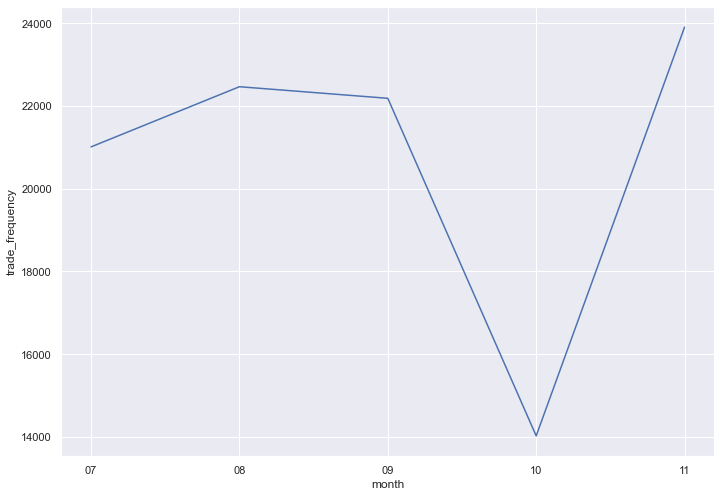

In [129]:
plott = data.loc[(data.year == "2005") & (data.month.isin(["07","08", "09", "10", "11"]))]
ax = sns.lineplot(data=plott, x="month", y="trade_frequency")

In [131]:
data.loc[(data.year == "2016") & (data.month.isin(["09", "10", "11"]))]

# 36832 to 22633 !

,date,trade_frequency,year,month,trade_frequency_change_MONTHLY,trade_frequency_per_year,cluster_temp,trade_frequency_per_6_month
200,1609,36832,2016,09,-0.055495,439401,2,209645
201,1610,22633,2016,10,-0.627358,439401,2,209645
202,1611,38096,2016,11,0.405896,439401,2,209645


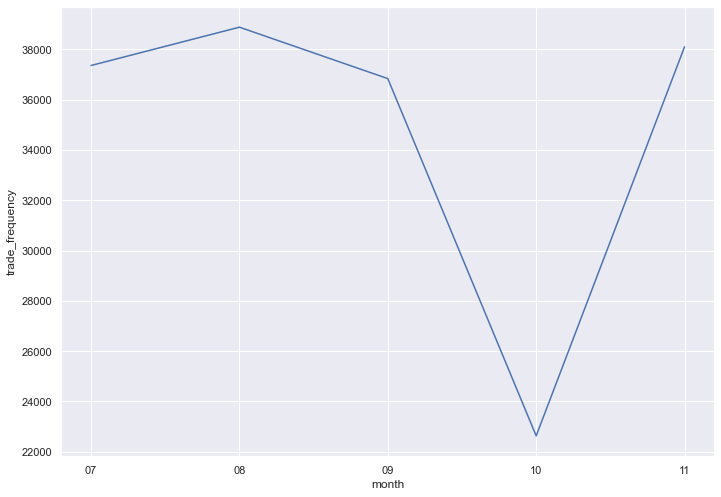

In [132]:
plott = data.loc[(data.year == "2016") & (data.month.isin(["07","08", "09", "10", "11"]))]
ax = sns.lineplot(data=plott, x="month", y="trade_frequency")

In [133]:
data.loc[(data.year == "2018") & (data.month.isin(["08", "09", "10"]))]

# 31995 to 18745 !

,date,trade_frequency,year,month,trade_frequency_change_MONTHLY,trade_frequency_per_year,cluster_temp,trade_frequency_per_6_month
223,1808,31995,2018,08,-0.007001,340647,2,154529
224,1809,18745,2018,09,-0.706855,340647,2,154529
225,1810,28261,2018,10,0.336718,340647,2,154529


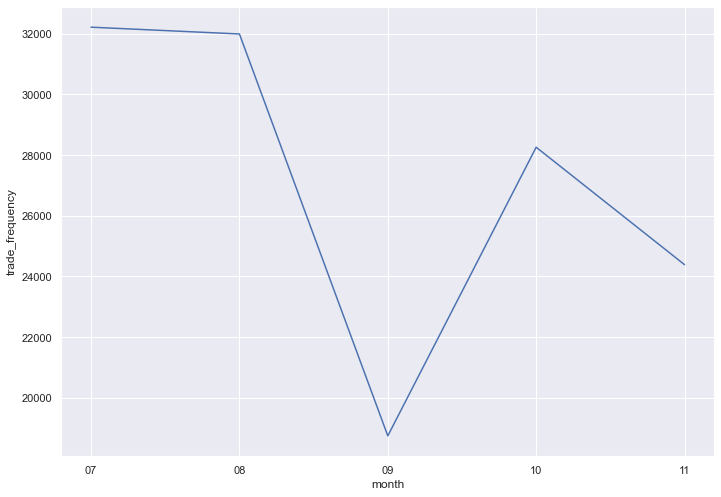

In [134]:
plott = data.loc[(data.year == "2018") & (data.month.isin(["07","08", "09", "10", "11"]))]
ax = sns.lineplot(data=plott, x="month", y="trade_frequency")